In [12]:
import numpy as np
import gui
import matplotlib.pyplot as plt
from myshow import myshow, myshow3d
import SimpleITK as sitk

### Windowing

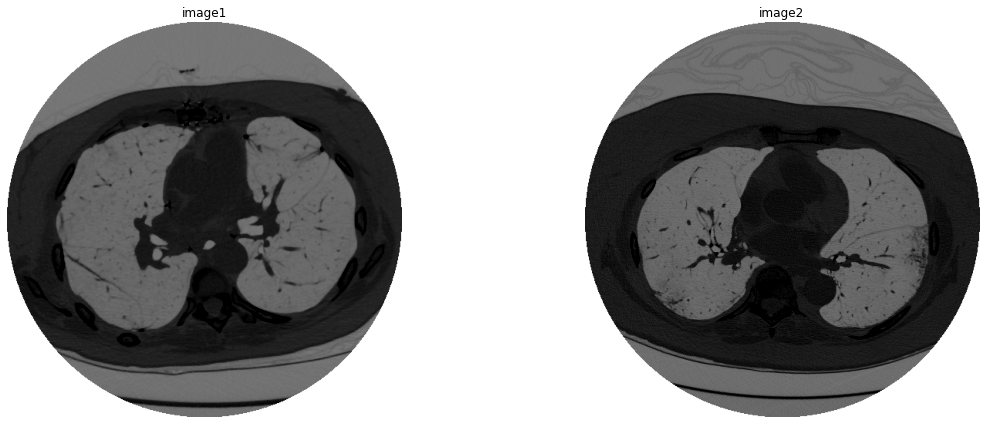

In [13]:
#Import image
img1 = sitk.ReadImage('/Users/eva/Desktop/manifest-1648618045475/3DImage_1B_000340.mha')
img2 = sitk.ReadImage('/Users/eva/Desktop/manifest-1648618045475/3DImage_26970.mha')

img1 = sitk.InvertIntensity(img1, maximum = 255)
img2 = sitk.InvertIntensity(img2, maximum = 255)

#Display Initial Image
gui.MultiImageDisplay(image_list = [img1, img2],                   
                      title_list = ['image1', 'image2'],
                      figure_size=(18,6));

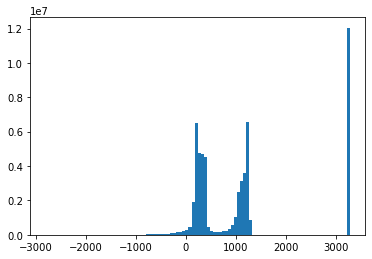

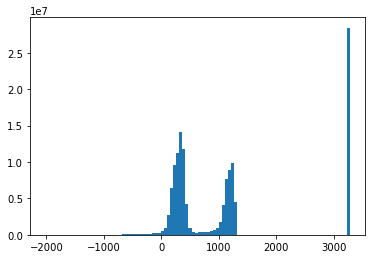

In [14]:
#Display histogram for image 1
plt.figure()
plt.hist(sitk.GetArrayViewFromImage(img1).flatten(), bins=100)
plt.show()

#Display histogram for image 2
plt.figure()
plt.hist(sitk.GetArrayViewFromImage(img2).flatten(), bins=100)
plt.show()

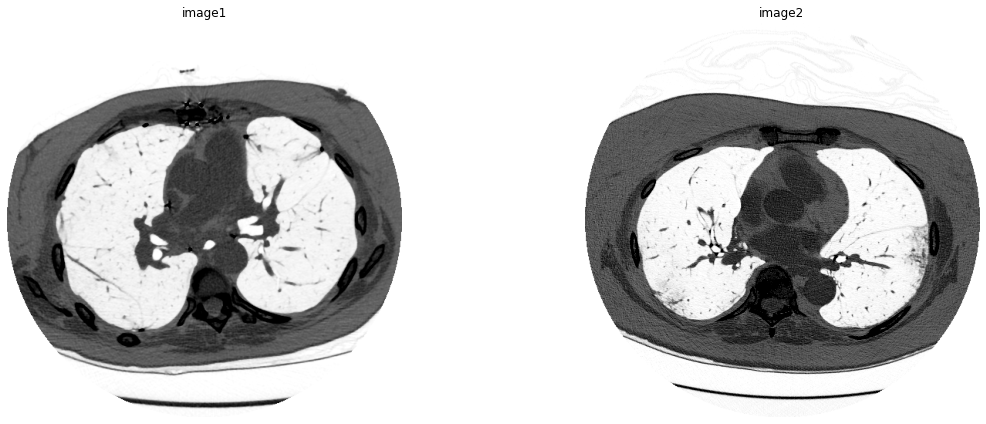

In [15]:
img1_4065 = sitk.Cast(sitk.IntensityWindowing(img1, windowMinimum=0, windowMaximum=1200, 
                                             outputMinimum=0.0, outputMaximum=4095.0), sitk.sitkInt32)
img2_4065 = sitk.Cast(sitk.IntensityWindowing(img2, windowMinimum=0, windowMaximum=1200, 
                                             outputMinimum=0.0, outputMaximum=4095.0), sitk.sitkInt32)
    
#Display windowed Image
gui.MultiImageDisplay(image_list = [img1_4065, img2_4065],                   
                      title_list = ['image1', 'image2'],
                      figure_size=(18,6));

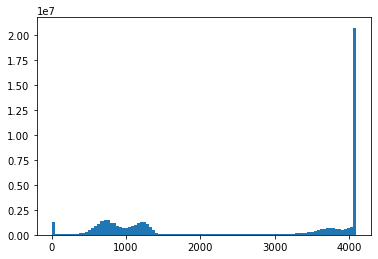

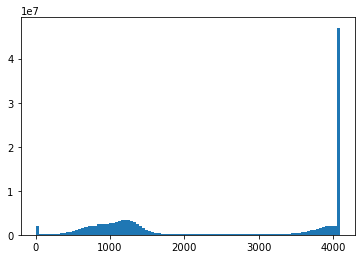

In [16]:
#Display histogram for image 1
plt.figure()
plt.hist(sitk.GetArrayViewFromImage(img1_4065).flatten(), bins=100)
plt.show()

#Display histogram for image 2
plt.figure()
plt.hist(sitk.GetArrayViewFromImage(img2_4065).flatten(), bins=100)
plt.show()

In [17]:
seg_img1 = sitk.BinaryThreshold(img1_4065, lowerThreshold=3000, upperThreshold=4095, insideValue=0, outsideValue=1)
myshow(seg_img1)
seg_img2 = sitk.BinaryThreshold(img2_4065, lowerThreshold=3000, upperThreshold=4095, insideValue=0, outsideValue=1)
myshow(seg_img2)

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=254, description='z', max=509), Output()), _dom_classes=('widget-interac…

In [26]:
seed1 = (170, 200, 107)
seg1 = sitk.ConfidenceConnected(
    seg_img1,
    seedList=[seed1],
    numberOfIterations=1,
    multiplier=2.5,
    initialNeighborhoodRadius=1,
    replaceValue=1,
)

seed2 = (170, 280, 127)
seg2 = sitk.ConfidenceConnected(
    seg_img2,
    seedList=[seed2],
    numberOfIterations=1,
    multiplier=2.5,
    initialNeighborhoodRadius=1,
    replaceValue=1,
)

myshow(sitk.LabelOverlay(seg_img1, seg1), "ConfidenceConnected")
result_img1 = sitk.LabelOverlay(seg_img1, seg1)

myshow(sitk.LabelOverlay(seg_img2, seg2), "ConfidenceConnected")
result_img2 = sitk.LabelOverlay(seg_img2, seg2)

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=254, description='z', max=509), Output()), _dom_classes=('widget-interac…

In [28]:
vectorRadius = (1, 1, 1)
kernel = sitk.sitkBall
#seg_implicit_thresholds_clean = sitk.BinaryMorphologicalOpening(
#    result, vectorRadius, kernel
#)
seg_implicit_thresholds_clean_1 = sitk.BinaryMorphologicalClosing(
    seg1, vectorRadius, kernel
)
seg_implicit_thresholds_clean_2 = sitk.BinaryMorphologicalClosing(
    seg2, vectorRadius, kernel
)
myshow(seg_implicit_thresholds_clean_1)
myshow(seg_implicit_thresholds_clean_2)

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=254, description='z', max=509), Output()), _dom_classes=('widget-interac…

### Registration

In [ ]:
fixed_image = 

interactive(children=(IntSlider(value=254, description='z', max=509), Output()), _dom_classes=('widget-interac…